In [25]:
from sklearn import svm
from sklearn.metrics import accuracy_score
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

In [26]:
# 1. Load MNIST dataset
mnist_train = datasets.MNIST(root='./data', train=True, download=True)
mnist_test = datasets.MNIST(root='./data', train=False, download=True)

In [27]:
# 2. Flatten and normalize
X_train = mnist_train.data.numpy().reshape(-1, 28*28) / 255.0
y_train = mnist_train.targets.numpy()
X_test = mnist_test.data.numpy().reshape(-1, 28*28) / 255.0
y_test = mnist_test.targets.numpy()

In [28]:
# 3. Train SVM on a subset
print("Training SVM on 10,000 samples...")
clf = svm.SVC(kernel='rbf', C=5, gamma=0.05)
clf.fit(X_train[:10000], y_train[:10000])
print("✅ Training complete.")

Training SVM on 10,000 samples...
✅ Training complete.


In [29]:
# 4. Predict on test set
print("Evaluating on test set...")
y_pred = clf.predict(X_test)

Evaluating on test set...


In [30]:
# 5. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy on test set: {accuracy * 100:.2f}%")

🎯 Accuracy on test set: 96.64%


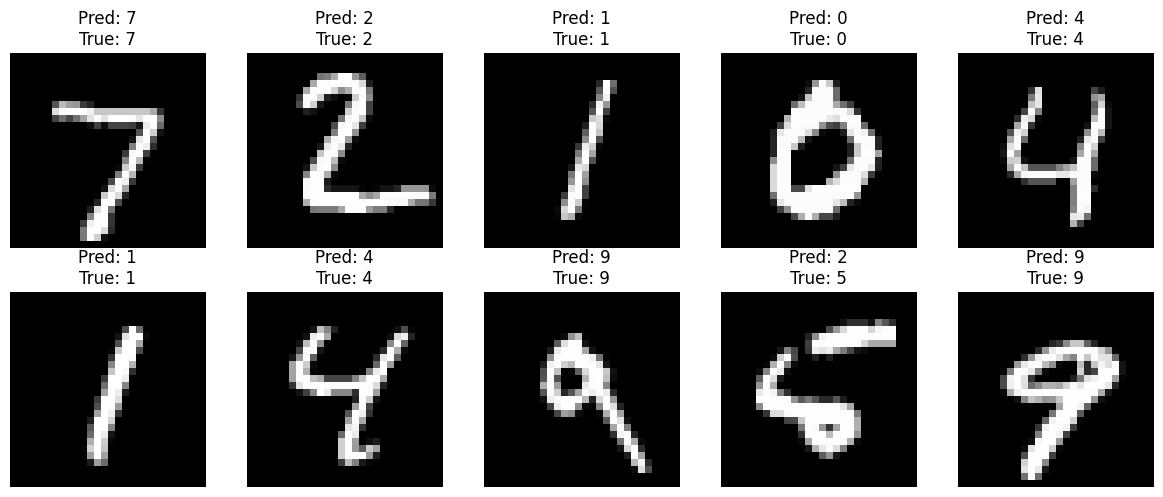

In [31]:
# 6. Display a few predictions with images
def show_predictions(images, predictions, actuals, count=10):
    plt.figure(figsize=(12, 5))
    for i in range(count):
        plt.subplot(2, count//2, i+1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f"Pred: {predictions[i]}\nTrue: {actuals[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Call function with actual images
show_predictions(mnist_test.data.numpy(), y_pred, y_test)